In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data = pd.read_csv('Fertilizer Prediction.csv')

data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [4]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [5]:
#checking unique values
data.nunique()

Temparature    14
Humidity       13
Moisture       41
Soil_Type       5
Crop_Type      11
Nitrogen       24
Potassium      13
Phosphorous    32
Fertilizer      7
dtype: int64

In [6]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [29]:
data=pd.DataFrame(data)

In [34]:
data['Soil_Type'] = data['Soil_Type'].astype('category')
data['Crop_Type'] = data['Crop_Type'].astype('category')
data['Fertilizer'] = data['Fertilizer'].astype('category')
    


In [35]:
data['Soil_Type'] =  data['Soil_Type'].cat.codes
data['Crop_Type'] =  data['Crop_Type'].cat.codes
data['Fertilizer'] =  data['Fertilizer'].cat.codes

In [36]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,2.010101,5.151515,18.909091,3.383838,18.606061,3.636364
std,3.502304,5.840331,11.271568,1.410565,3.140790,11.599693,5.814667,13.476978,1.950691
min,25.000000,50.000000,25.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,1.000000,2.000000,10.000000,0.000000,9.000000,2.000000
50%,30.000000,60.000000,41.000000,2.000000,5.000000,13.000000,0.000000,19.000000,4.000000
75%,33.000000,64.000000,50.500000,3.000000,8.000000,24.000000,7.500000,30.000000,5.000000
max,38.000000,72.000000,65.000000,4.000000,10.000000,42.000000,19.000000,42.000000,6.000000


In [37]:
#Defining function for Continuous and catogorical variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = data.Fertilizer)
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = data.Fertilizer, ax=axes[1])

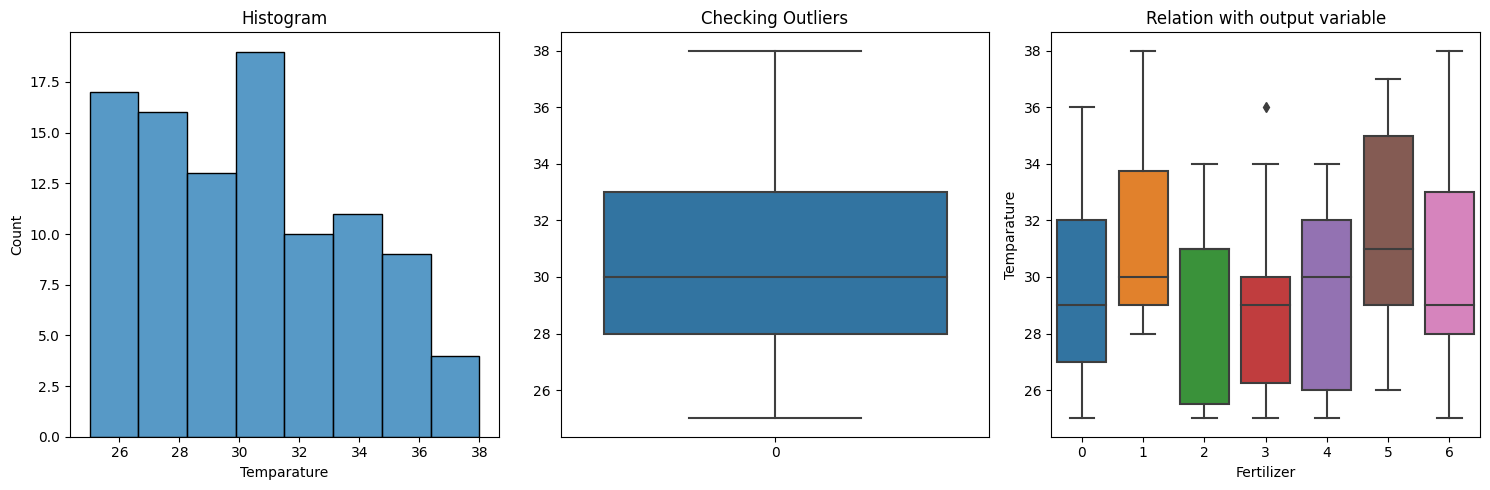

In [38]:
#EDA - Temparature variable
plot_conti(data.Temparature)

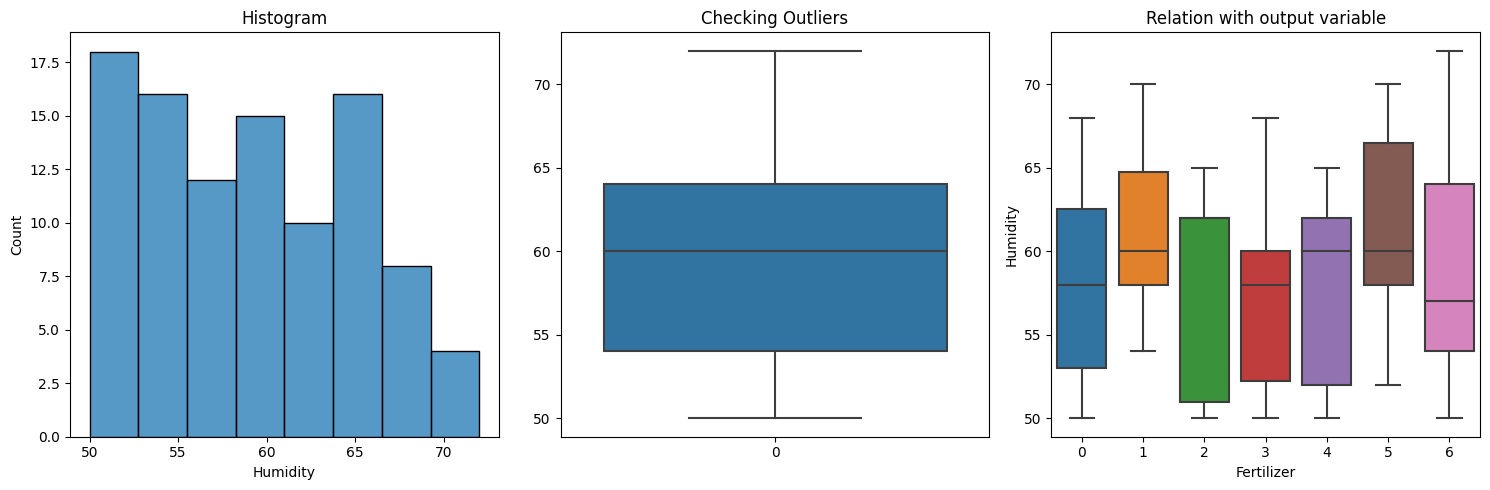

In [39]:
#EDA - Humidity variable
plot_conti(data.Humidity)

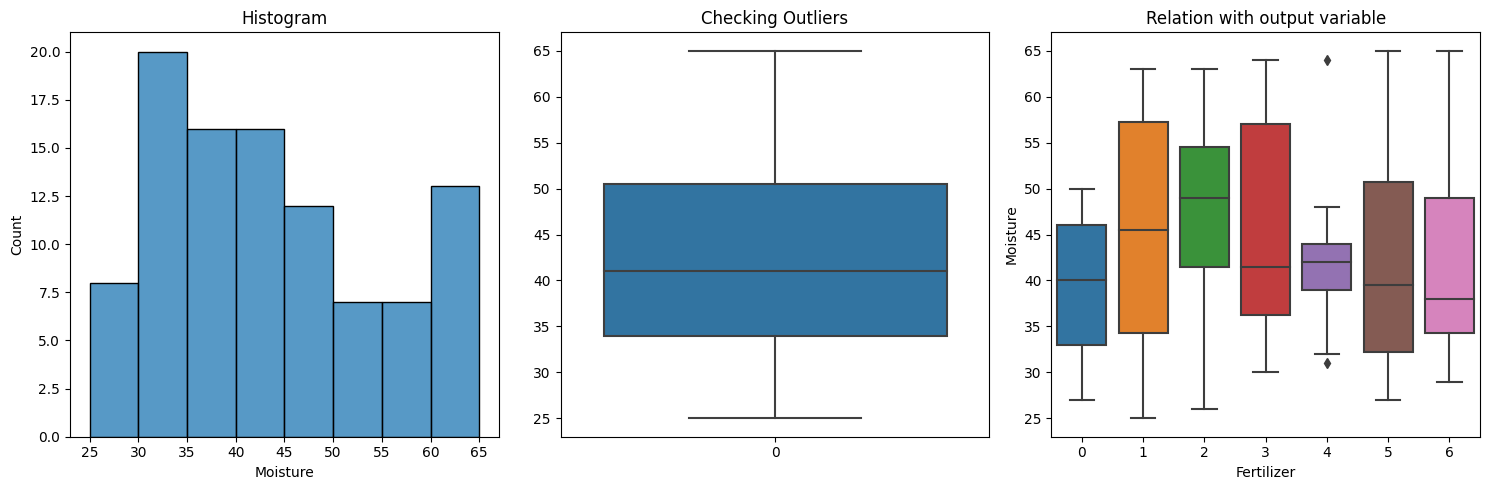

In [40]:
#EDA - Moisture variable
plot_conti(data.Moisture)

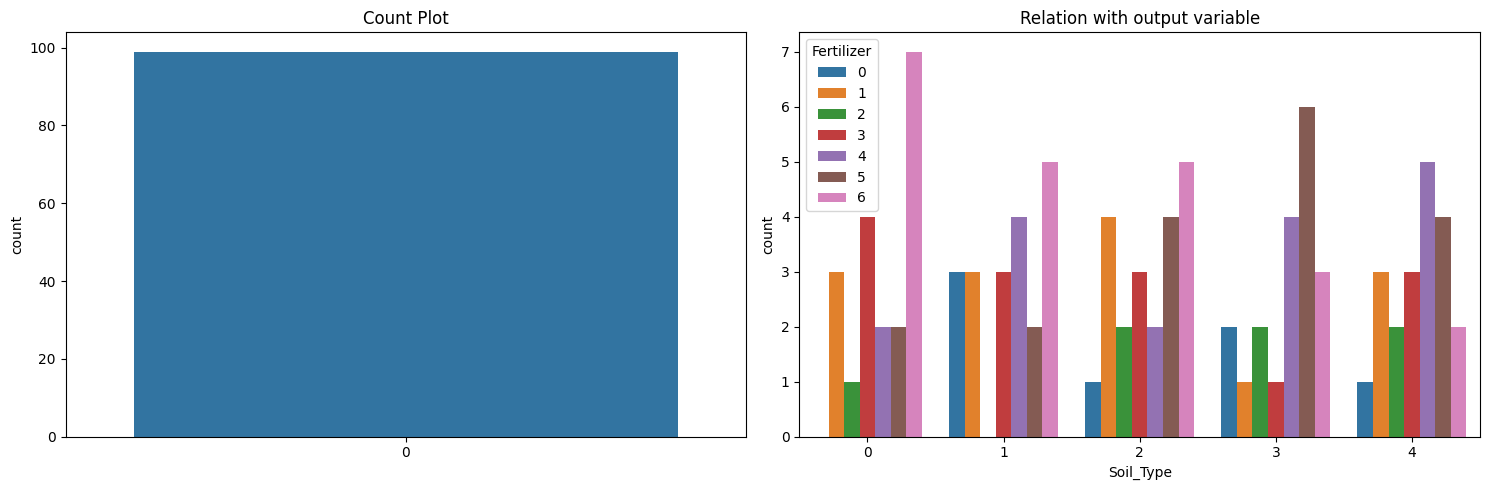

In [41]:
#EDA - Soil_Type variable
plot_cato(data.Soil_Type)

<AxesSubplot: xlabel='Soil_Type', ylabel='Temparature'>

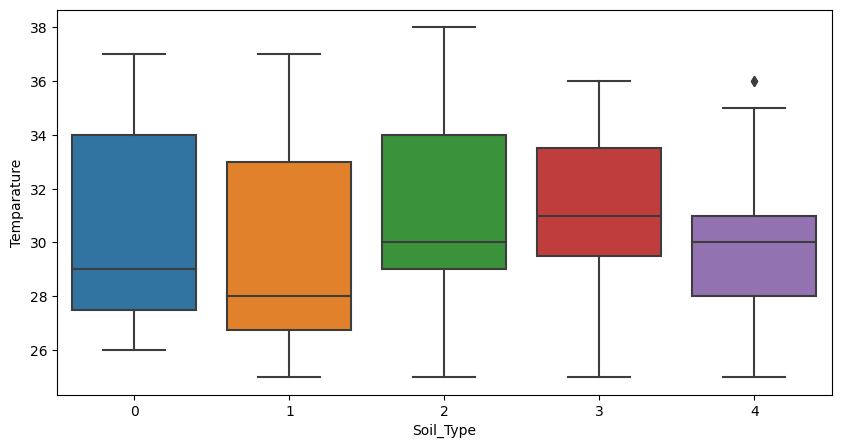

In [42]:
#relation of soil type with Temperature 
plt.figure(figsize=(10,5))
sns.boxplot(x=data.Soil_Type,y=data.Temparature)

<AxesSubplot: xlabel='Soil_Type', ylabel='Temparature'>

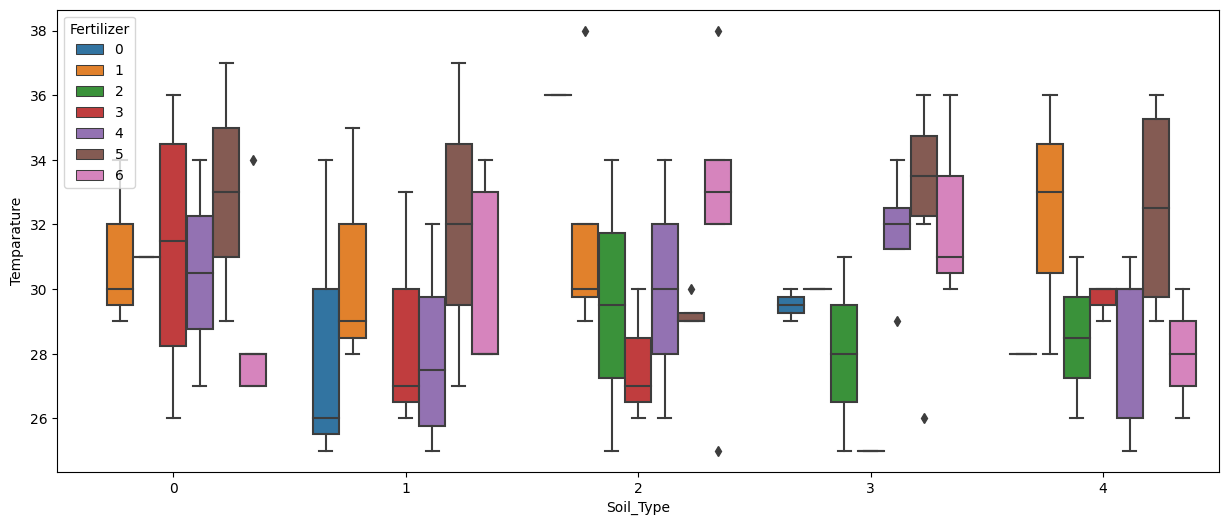

In [43]:
#relation of soil type and Temperature with output variable
plt.figure(figsize=(15,6))
sns.boxplot(x=data.Soil_Type,y=data.Temparature,hue=data.Fertilizer)

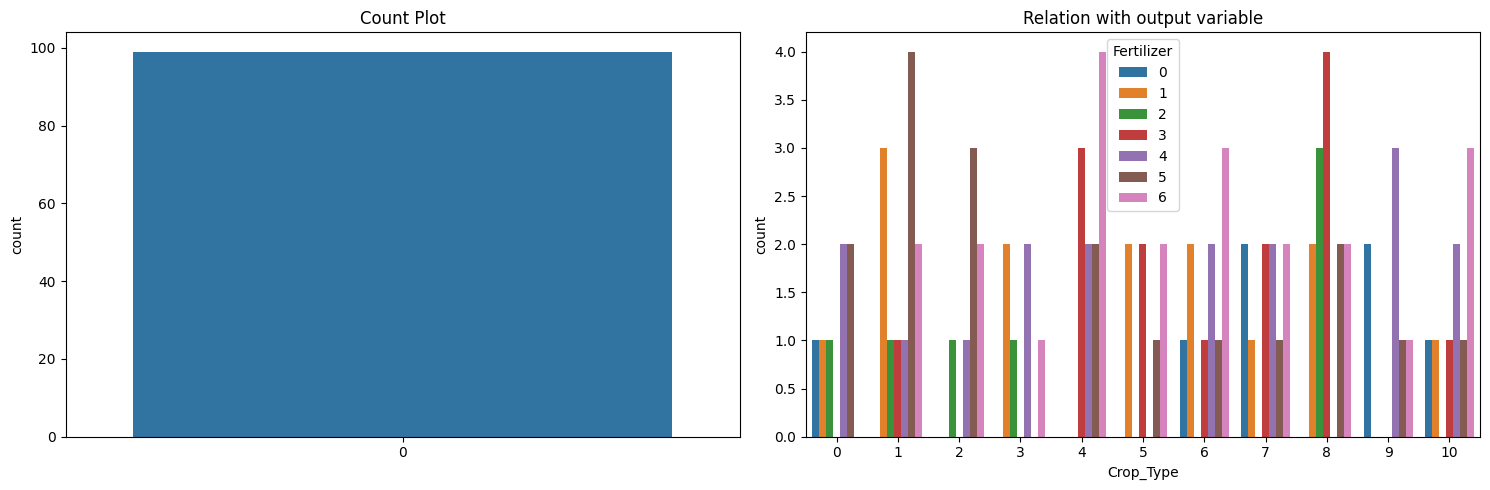

In [44]:
#EDA - Crop_Type variable
plot_cato(data.Crop_Type)

<AxesSubplot: xlabel='Crop_Type', ylabel='Temparature'>

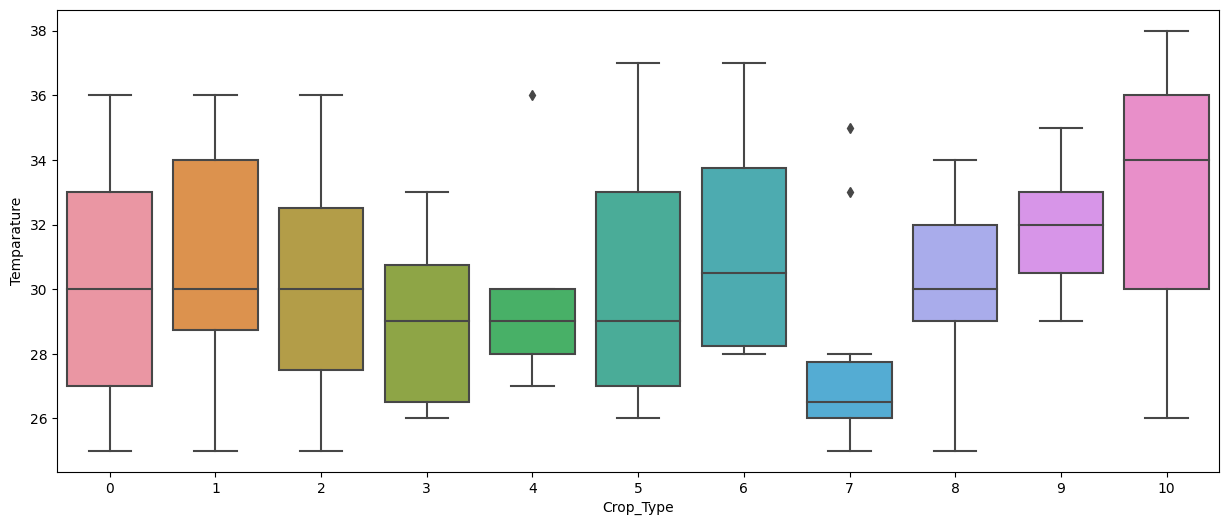

In [45]:
#relation of crop type with temperature
plt.figure(figsize=(15,6))
sns.boxplot(x=data.Crop_Type,y=data.Temparature)

<AxesSubplot: xlabel='Crop_Type', ylabel='Humidity'>

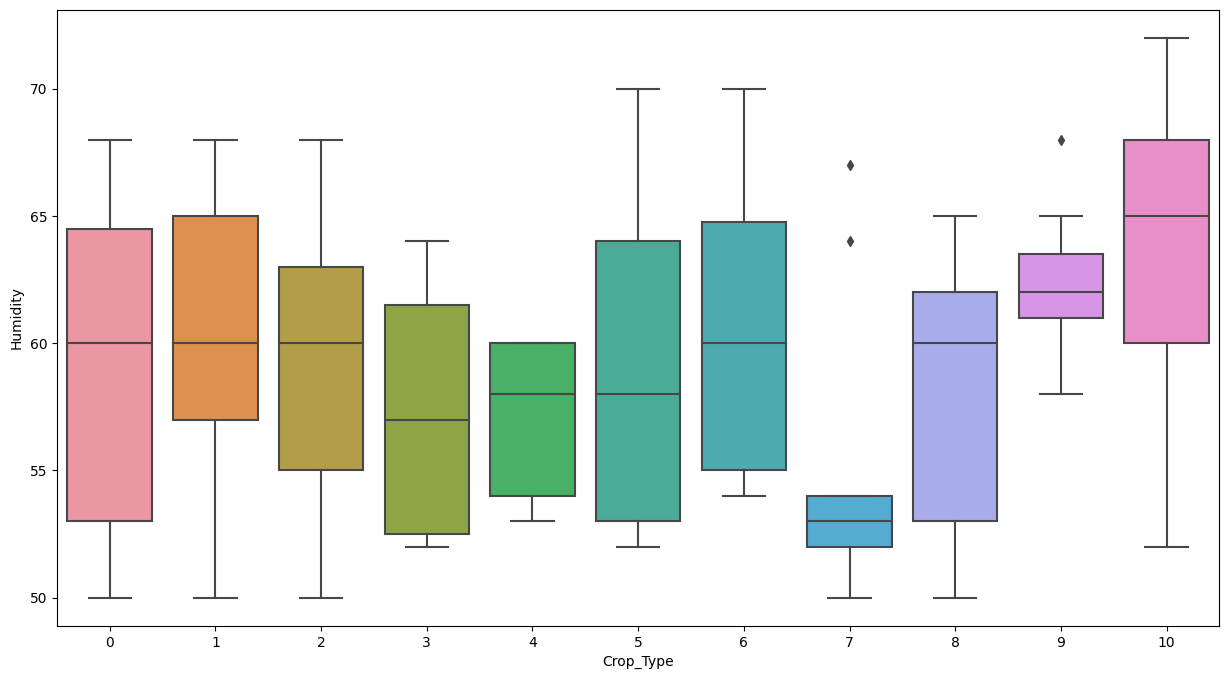

In [46]:
#relation of crop type with Humidity
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Crop_Type,y=data.Humidity)

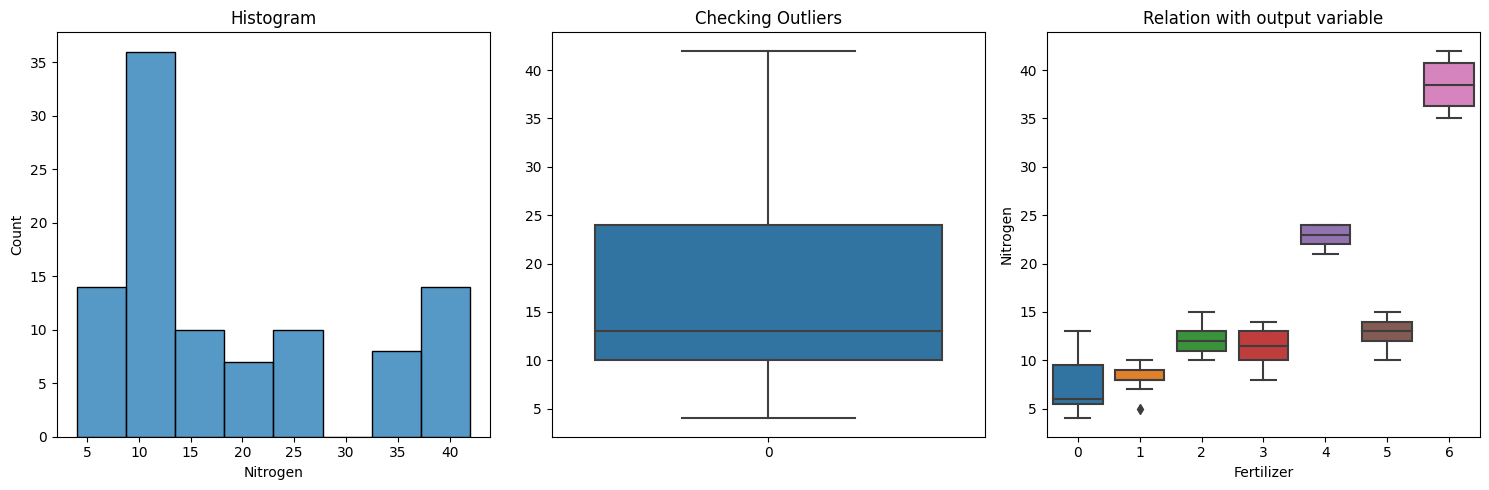

In [47]:
#EDA - Nitrogen variable
plot_conti(data.Nitrogen)

<AxesSubplot: xlabel='Crop_Type', ylabel='Nitrogen'>

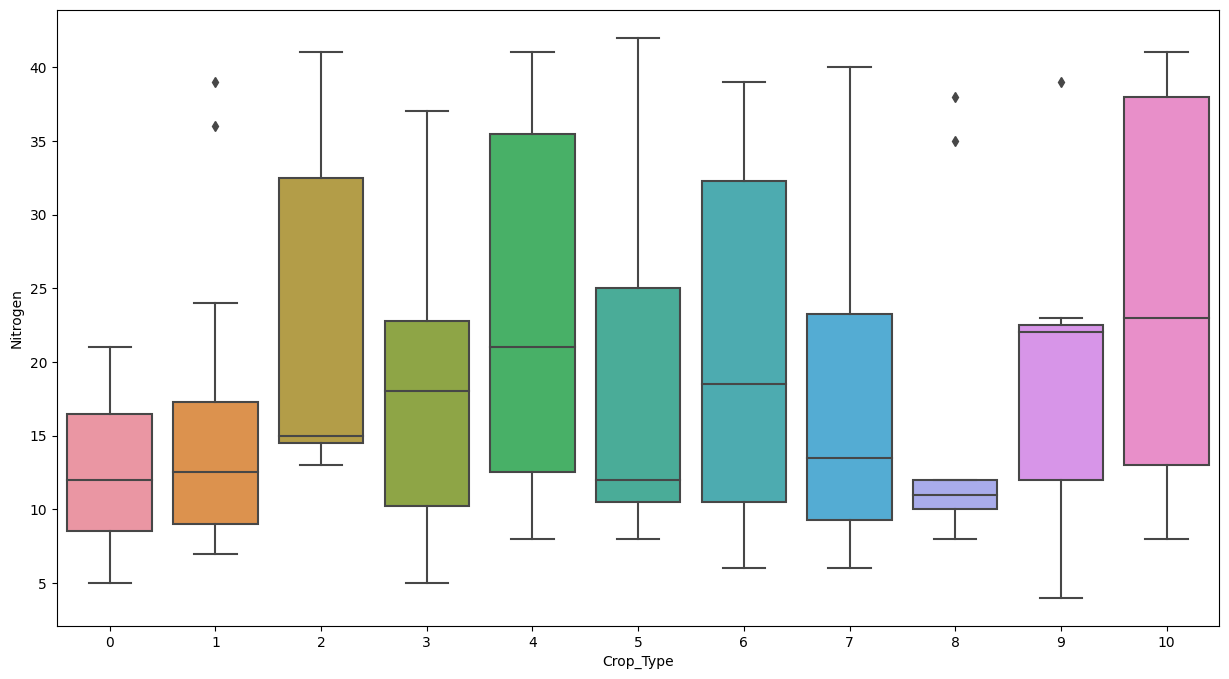

In [48]:
#relation of nitrogen wrt to crop type
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Crop_Type,y=data.Nitrogen)

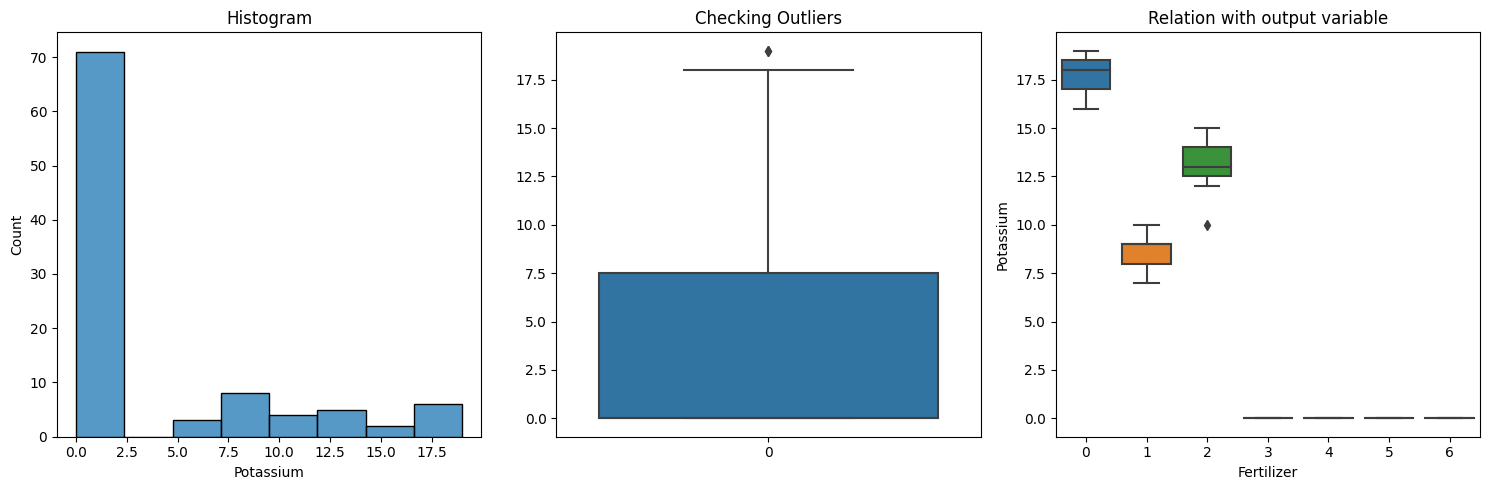

In [49]:
#EDA - Potassium variable
plot_conti(data.Potassium)

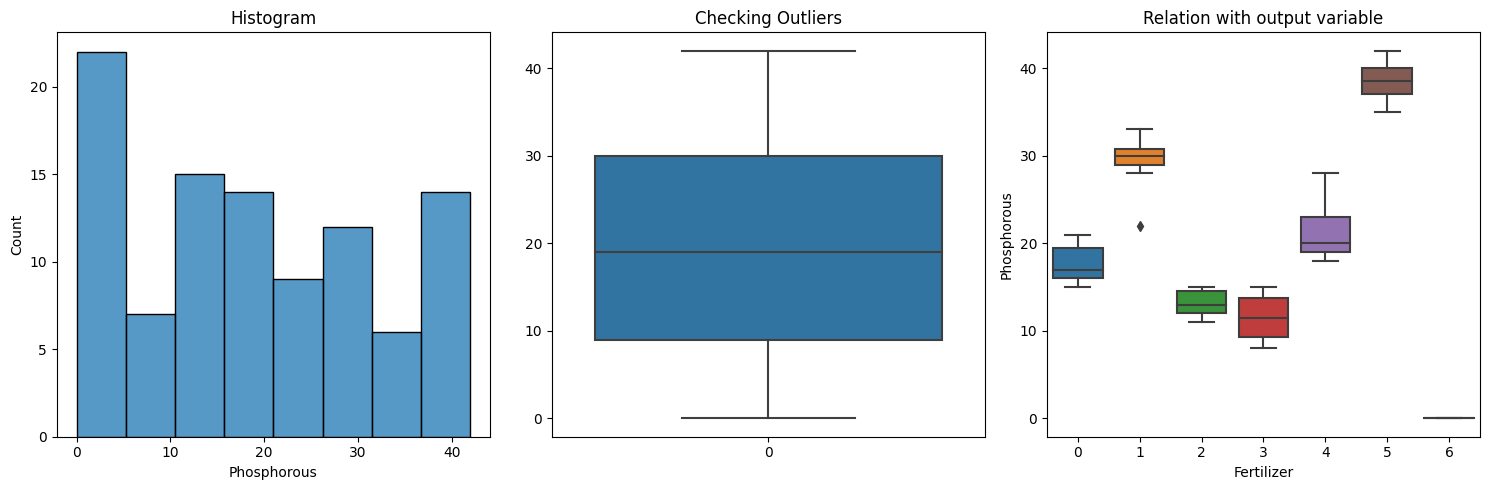

In [50]:
#EDA - Phosphorous variable
plot_conti(data.Phosphorous)

In [51]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder

In [52]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
0,0
1,1
2,2
3,3
4,4


In [53]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8


In [54]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
0,0
1,1
2,2
3,3
4,4
5,5
6,6


In [55]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 8), y_train = (79,), x_test = (20, 8), y_test = (20,)


In [56]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 2 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  79 non-null     int64
 1   Humidity     79 non-null     int64
 2   Moisture     79 non-null     int64
 3   Soil_Type    79 non-null     int64
 4   Crop_Type    79 non-null     int64
 5   Nitrogen     79 non-null     int64
 6   Potassium    79 non-null     int64
 7   Phosphorous  79 non-null     int64
dtypes: int64(8)
memory usage: 5.6 KB


### Logistic regression model

In [57]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()

In [59]:
pred_rand = rand.fit(x_train,y_train).predict(x_test)

print(classification_report(y_test,pred_rand))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.88        20
weighted avg       0.93      0.90      0.88        20



In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}

grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.88        20
weighted avg       0.93      0.90      0.88        20

Best score :  0.9876543209876543
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}


In [62]:
#Final Model
params = {
    'n_estimators':[350,400,450],
    'max_depth':[2,3,4,5,6,7],
    'min_samples_split':[2,5,8]
}

grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(data.drop('Fertilizer',axis=1),data.Fertilizer)

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best score :  0.98989898989899
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 350}


In [63]:
x_train

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous
2,34,65,62,0,1,7,9,30
44,35,67,42,4,0,10,0,35
59,32,62,34,3,2,15,0,37
55,27,53,43,0,4,23,0,24
19,29,58,52,2,10,13,0,36
...,...,...,...,...,...,...,...,...
75,29,58,42,1,6,9,10,22
9,29,58,33,0,5,9,7,30
72,34,65,48,2,10,23,0,19
12,25,50,65,2,1,36,0,0


In [64]:
#pickling the file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [65]:
model = pickle.load(open('classifier.pkl','rb'))
x= model.predict([[34,67,62,0,1,7,0,30]])
print(x)

[5]


In [67]:
#pickling the file
import pickle
pickle_out = open('fertilizer.pkl','wb')
pickle.dump(encode_ferti,pickle_out)
pickle_out.close()

In [68]:
ferti = pickle.load(open('fertilizer.pkl','rb'))
ferti.classes_[6]

6

In [70]:
data

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6
...,...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19,4
95,30,60,27,3,9,4,17,17,0
96,38,72,51,2,10,39,0,0,6
97,36,60,43,4,4,15,0,41,5


In [71]:
df = pd.read_csv('Fertilizer Prediction.csv')


In [72]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


[CV 1/3] END max_depth=5, min_samples_split=2, n_estimators=300;, score=0.926 total time=   1.6s
[CV 2/3] END max_depth=5, min_samples_split=2, n_estimators=400;, score=1.000 total time=   2.0s
[CV 3/3] END max_depth=5, min_samples_split=2, n_estimators=500;, score=1.000 total time=   2.3s
[CV 3/3] END max_depth=5, min_samples_split=5, n_estimators=400;, score=1.000 total time=   1.8s
[CV 1/3] END max_depth=5, min_samples_split=8, n_estimators=300;, score=0.889 total time=   1.5s
[CV 3/3] END max_depth=5, min_samples_split=8, n_estimators=300;, score=0.962 total time=   1.8s
[CV 1/3] END max_depth=5, min_samples_split=8, n_estimators=500;, score=0.889 total time=   2.4s
[CV 2/3] END max_depth=10, min_samples_split=2, n_estimators=300;, score=0.962 total time=   1.4s
[CV 3/3] END max_depth=10, min_samples_split=2, n_estimators=400;, score=1.000 total time=   1.8s
[CV 1/3] END max_depth=10, min_samples_split=5, n_estimators=300;, score=0.926 total time=   1.4s
[CV 3/3] END max_depth=10, 

[CV 2/3] END max_depth=5, min_samples_split=2, n_estimators=300;, score=0.962 total time=   1.6s
[CV 3/3] END max_depth=5, min_samples_split=2, n_estimators=400;, score=1.000 total time=   2.0s
[CV 1/3] END max_depth=5, min_samples_split=5, n_estimators=300;, score=0.926 total time=   1.4s
[CV 3/3] END max_depth=5, min_samples_split=5, n_estimators=300;, score=1.000 total time=   1.4s
[CV 1/3] END max_depth=5, min_samples_split=5, n_estimators=500;, score=0.889 total time=   2.3s
[CV 2/3] END max_depth=5, min_samples_split=8, n_estimators=300;, score=0.923 total time=   1.9s
[CV 3/3] END max_depth=5, min_samples_split=8, n_estimators=400;, score=0.962 total time=   2.1s
[CV 1/3] END max_depth=10, min_samples_split=2, n_estimators=300;, score=0.963 total time=   1.4s
[CV 1/3] END max_depth=10, min_samples_split=2, n_estimators=400;, score=0.963 total time=   1.8s
[CV 2/3] END max_depth=10, min_samples_split=2, n_estimators=500;, score=1.000 total time=   2.3s
[CV 1/3] END max_depth=10, 